<a href="https://colab.research.google.com/github/lucckkas/MachineLearning/blob/main/Regresion%20lineal/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

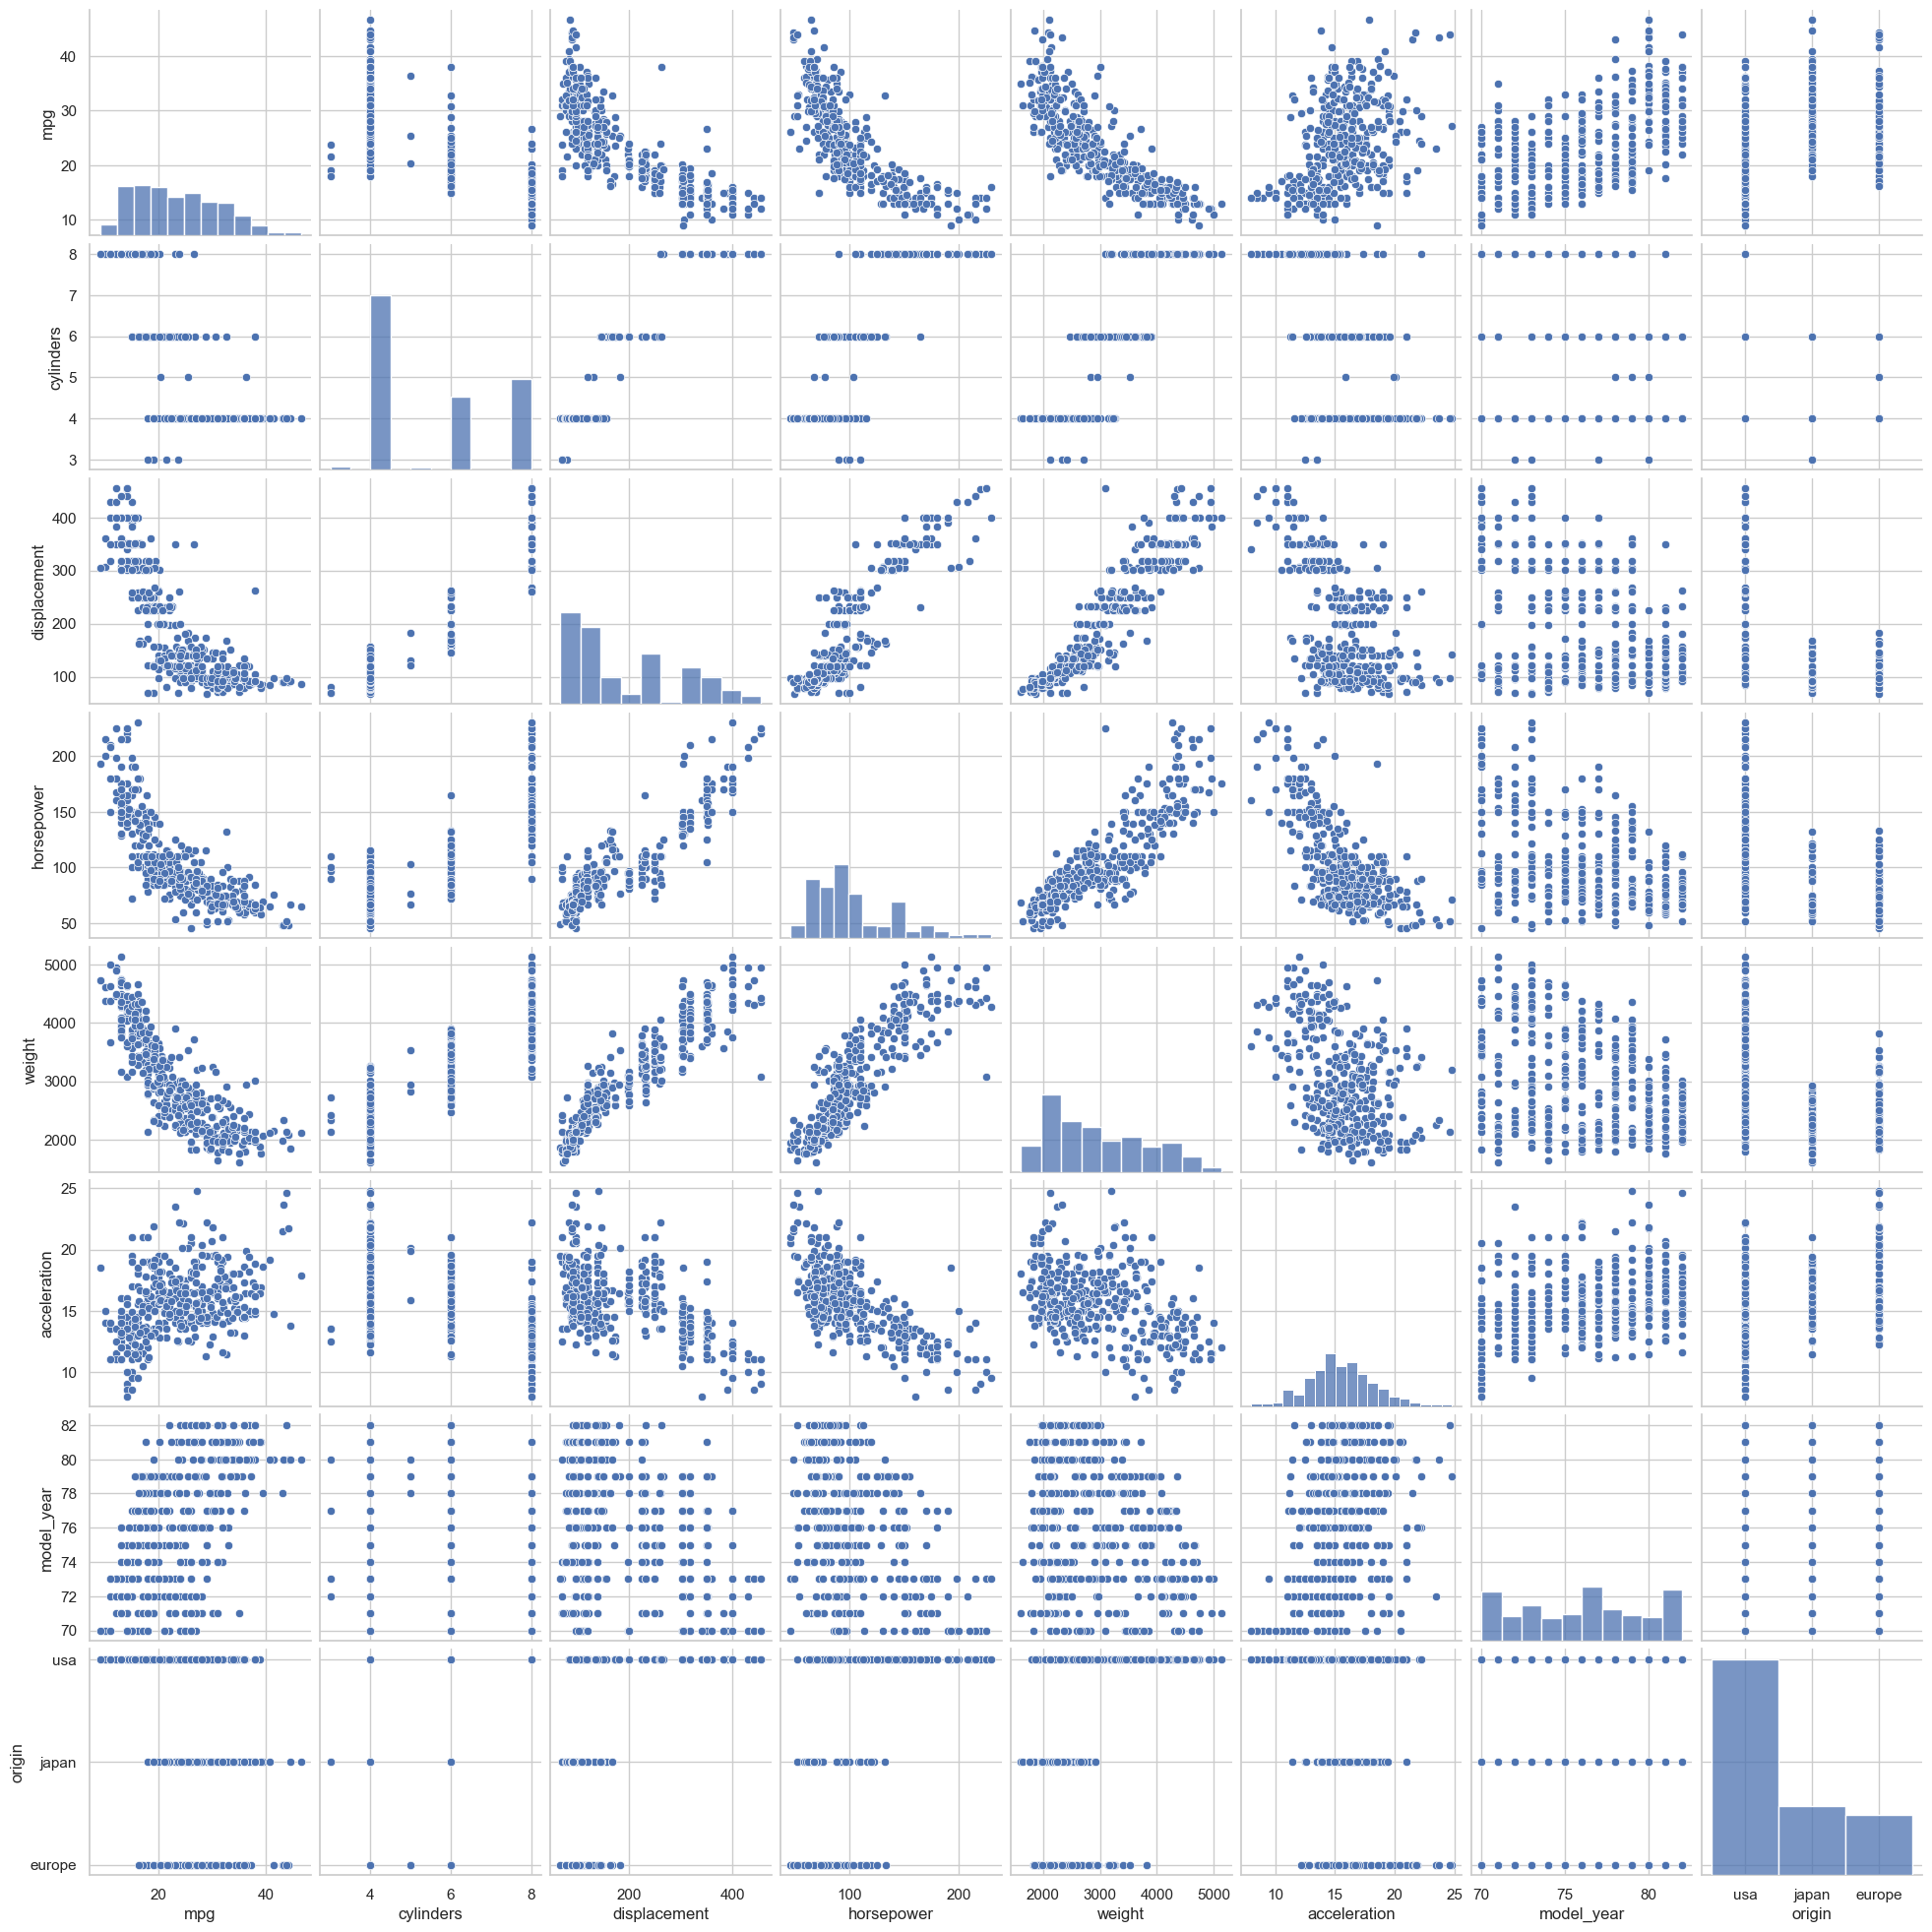

In [ ]:
import seaborn as sns

# Cargamos auto mpg dataset de seaborn
mpg = sns.load_dataset('mpg')

# sacamos el name del dataset ya que no es relevante para el analisis
mpg = mpg.drop('name', axis=1)

# sacamos todos los datos que tengan valores nulos
mpg = mpg.dropna()

# Visualizamos el dataset
sns.pairplot(mpg, vars=['mpg', 'cylinders', 'displacement',"horsepower", 'weight', 'acceleration', 'model_year', 'origin'])

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<Axes: >

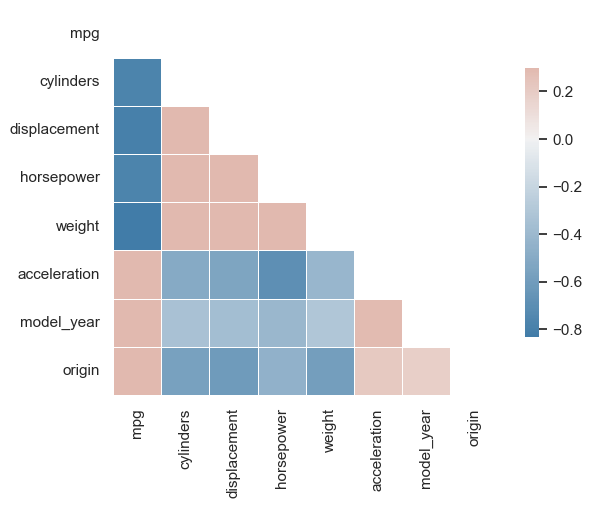

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Convertimos el origen a numerico para poder hacer la matriz de correlación
# usa -> 1
# europe -> 2
# japan origin -> 3
mpg["origin"] = mpg["origin"].replace({"usa": "1", "europe": "2", "japan": "3"})
mpg["origin"] = pd.to_numeric(mpg["origin"])

# Creamos matriz de correlación
corr = mpg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})


3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [ ]:
# creamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separamos las variables dependientes e independientes
X = mpg.drop('mpg', axis=1)
y = mpg['mpg']

# Separamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacemos las predicciones
y_predict = model.predict(X_test)

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [ ]:
# Estadísticas del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculamos los errores
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)


# Visualizamos los errores
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)



MAE: 2.6513181206777814
MSE: 12.686903098613094
RMSE: 3.5618679226794883
R2: 0.8213917960635612


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


<Axes: xlabel='mpg', ylabel='weight'>

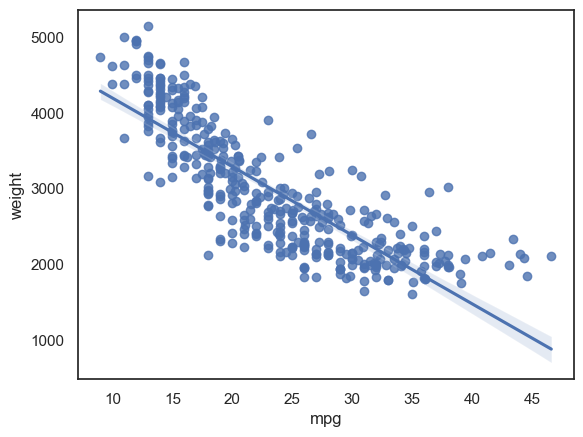

In [ ]:
# variables con mayor correlación
corr_target = abs(corr["mpg"])
most_correlated = corr_target.sort_values(ascending=False)
most_correlated = most_correlated.drop('mpg')

# Visualizamos las variables con mayor correlación
sns.regplot(x='mpg', y=most_correlated.index[0], data=mpg)




6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.